In [15]:
%load_ext autoreload
%autoreload 2
from configs import project_config
import matplotlib.pyplot as plt
import numpy as np
from configs.RecursiveVPSDE.LSTM_fQuadSinHF.recursive_LSTM_PostMeanScore_fQuadSinHF_T256_H05_tl_110data import \
    get_config
from configs.RecursiveVPSDE.LSTM_fBiPot.recursive_LSTM_PostMeanScore_fBiPot_T256_H05_tl_110data import get_config



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
config = get_config()

In [17]:
def rmse_ignore_nans(y_true, y_pred):
    assert (y_true.shape == y_pred.shape and len(y_pred.shape) == 1)
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)  # Ignore NaNs in both arrays
    return np.sqrt(np.mean((y_true[mask] - y_pred[mask]) ** 2))

In [18]:
if "fQuadSin" in config.data_path:
    minx = -1.2
    ts_type = "fQuadSin"
elif "fBiPotSmall" in config.data_path:
    minx = -2
    ts_type = "fBiPotSmall"
elif "fBiPot" in config.data_path:
    minx = -1.5
    ts_type = "fBiPot"
maxx = -minx
print(ts_type)

fBiPotSmall


In [19]:
import os
keepfiles = []
root_dir = project_config.ROOT_DIR + f"experiments/results/"
for file in os.listdir(root_dir):
    if "Hermite" in file and ts_type in file:
        keepfiles.append(root_dir+file)
Xshape = np.load(keepfiles[0]).flatten().shape[0]

In [20]:
vispaths = np.linspace(minx, maxx, Xshape)
num_paths = 10952
if "QuadSin" in config.data_path:
    is_true_drift = -2.*config.quad_coeff * vispaths.flatten() + config.sin_coeff * config.sin_space_scale*np.sin(config.sin_space_scale*vispaths.flatten())
elif "fSin" in config.data_path:
    is_true_drift = config.mean_rev*np.sin(vispaths.flatten())
elif "BiPot" in config.data_path:
    is_true_drift = -(4.*config.quartic_coeff * np.power(vispaths, 3) + 2.*config.quad_coeff * vispaths + config.const).flatten()


/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TS_Hermite_fBiPotSmall_DriftEvalExp_8R_10152NPaths_Hermite_unifdriftHats.npy


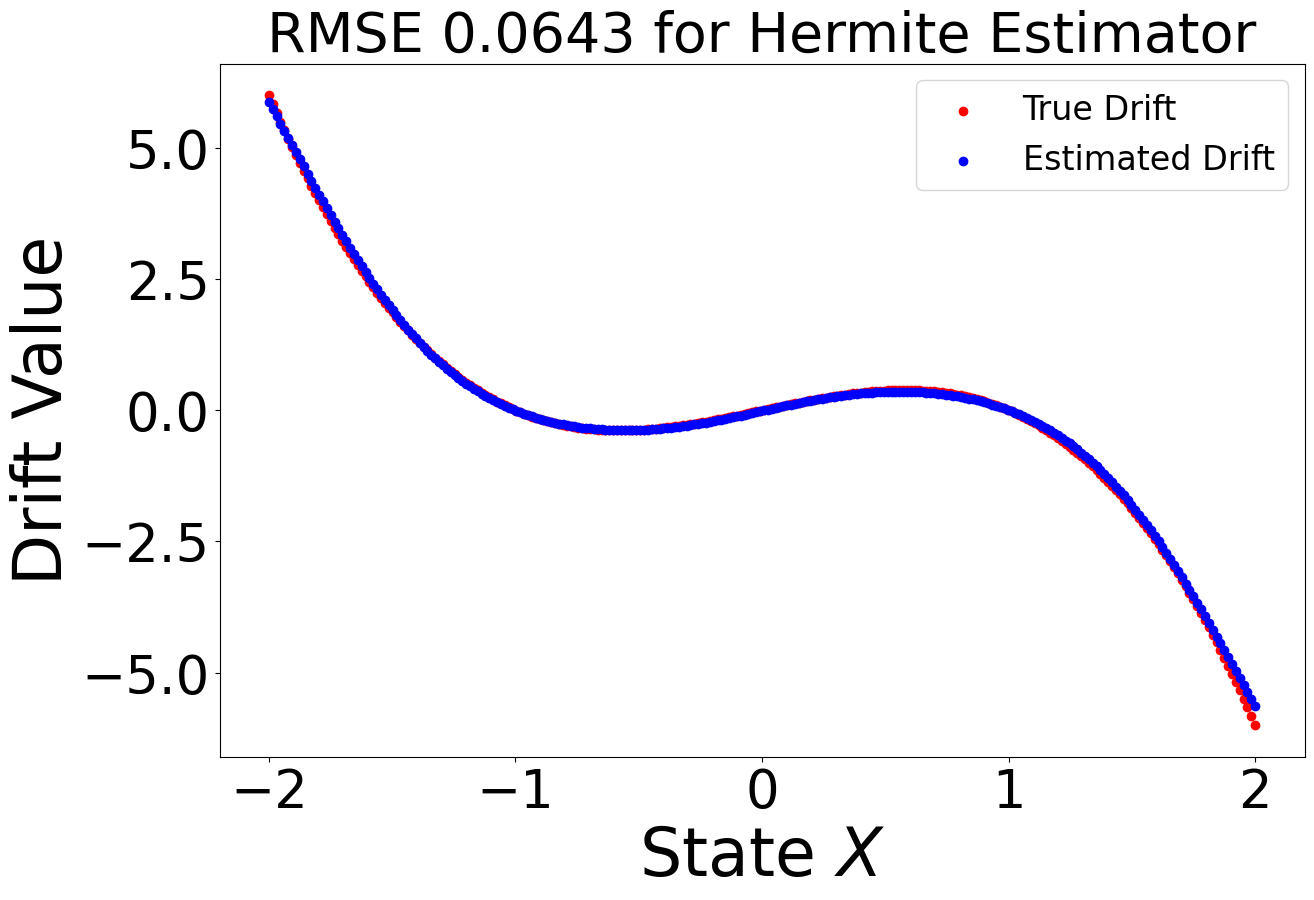

In [21]:
for f in keepfiles:
    print(f)
    is_drift = np.load(f).flatten()
    fig, ax = plt.subplots(figsize=(14,9))
    plt.scatter(vispaths, is_true_drift,label="True Drift", color="red")
    plt.scatter(vispaths, is_drift, label="Estimated Drift", color="blue")
    plt.legend(fontsize=18)
    rmse = (rmse_ignore_nans(is_true_drift, is_drift))
    plt.title(f"RMSE {round(rmse, 4)} for Hermite Estimator", fontsize=40)
    ax.tick_params(labelsize=38)
    plt.ylabel("Drift Value", fontsize=48)
    plt.xlabel(r"State $X$", fontsize=48)
    plt.legend(fontsize=24)
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/{ts_type}_Hermite.png",  bbox_inches='tight')
    plt.show()
    plt.close()
